In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
df=pd.read_csv('Netflix_Userbase.csv')


In [4]:
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [5]:
df.tail()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
2495,2496,Premium,14,25-07-22,12-07-23,Spain,28,Female,Smart TV,1 Month
2496,2497,Basic,15,04-08-22,14-07-23,Spain,33,Female,Smart TV,1 Month
2497,2498,Standard,12,09-08-22,15-07-23,United States,38,Male,Laptop,1 Month
2498,2499,Standard,13,12-08-22,12-07-23,Canada,48,Female,Tablet,1 Month
2499,2500,Basic,15,13-08-22,12-07-23,United States,35,Female,Smart TV,1 Month


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB


In [7]:
df.describe()

,User ID,Monthly Revenue,Age
count,2500.00000,2500.000000,2500.000000
mean,1250.50000,12.508400,38.795600
std,721.83216,1.686851,7.171778
min,1.00000,10.000000,26.000000
25%,625.75000,11.000000,32.000000
50%,1250.50000,12.000000,39.000000
75%,1875.25000,14.000000,45.000000
max,2500.00000,15.000000,51.000000


In [10]:
user_counts = df['Subscription Type'].value_counts()
user_counts

Basic       999
Standard    768
Premium     733
Name: Subscription Type, dtype: int64

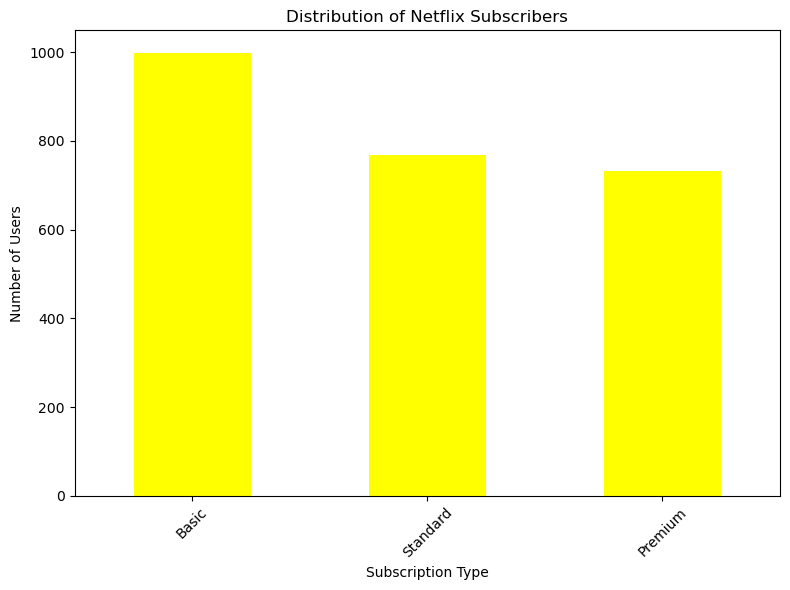

In [42]:
plt.figure(figsize=(8, 6))
user_counts.plot(kind='bar', color='yellow')
plt.title('Distribution of Netflix Subscribers')
plt.xlabel('Subscription Type')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [14]:
age_count = df['Age'].value_counts()
age_count

39    116
30    116
28    115
31    115
41    114
47    111
37    107
35    105
29    104
40    103
42    102
48    101
46     99
36     99
49     97
43     94
33     93
51     93
32     92
45     89
38     89
34     88
27     87
44     86
50     84
26      1
Name: Age, dtype: int64

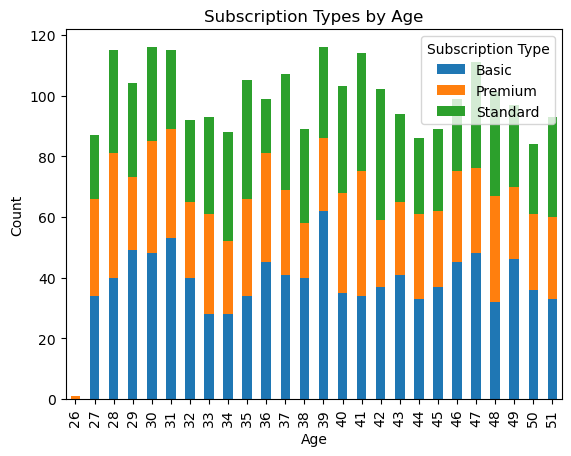

In [21]:
cross_tab = pd.crosstab(df["Age"], df["Subscription Type"])

# Plot the cross-tabulation as a bar plot
cross_tab.plot(kind="bar", stacked=True)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Subscription Types by Age")
plt.legend(title="Subscription Type")
plt.show()

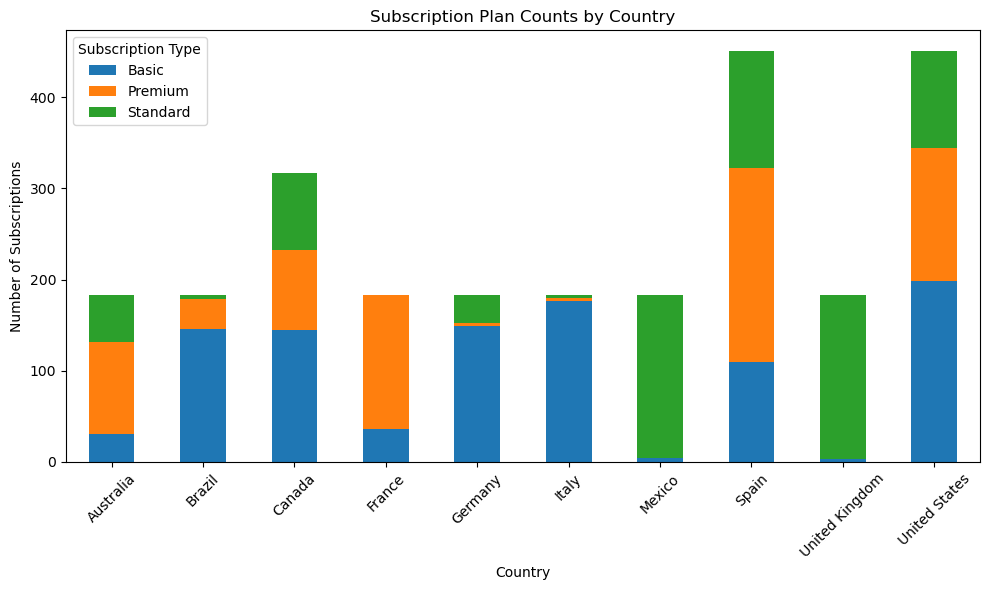

In [27]:
subscription_counts =df.groupby(['Country', 'Subscription Type'])['User ID'].count().unstack()

ax = subscription_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Subscription Plan Counts by Country')
plt.xlabel('Country')
plt.ylabel('Number of Subscriptions')
plt.xticks(rotation=45)
plt.legend(title='Subscription Type')
plt.tight_layout()
plt.show()

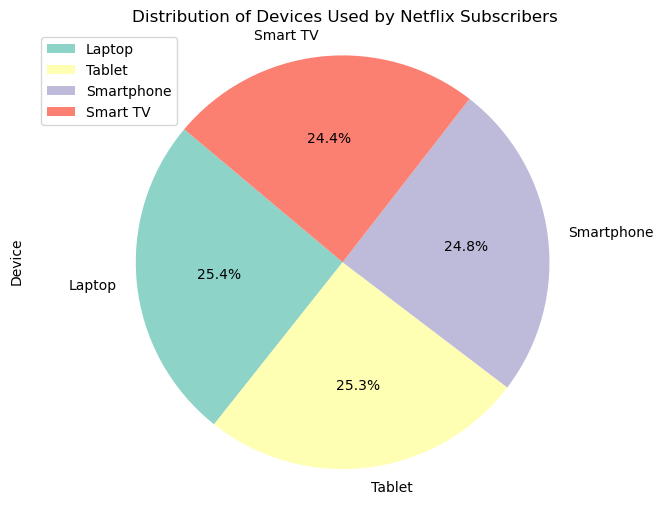

In [24]:
device_counts = df['Device'].value_counts()

plt.figure(figsize=(8, 6))
device_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)
plt.title('Distribution of Devices Used by Netflix Subscribers')
plt.axis('equal')
plt.legend(device_counts.index, loc='best')
plt.show()

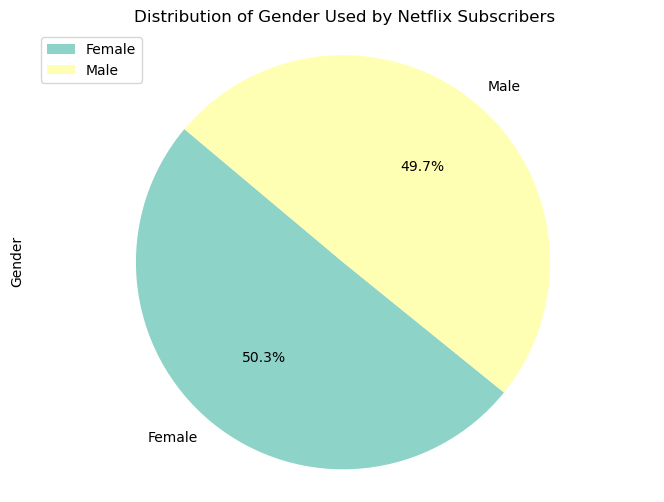

In [25]:
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(8, 6))
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)
plt.title('Distribution of Gender Used by Netflix Subscribers')
plt.axis('equal')
plt.legend(gender_counts.index, loc='best')
plt.show()

In [28]:
df['Join Date'] = pd.to_datetime(df['Join Date'], format='%d-%m-%y')
df['Last Payment Date'] = pd.to_datetime(df['Last Payment Date'], format='%d-%m-%y')
df['Duration (days)'] = (df['Last Payment Date'] - df['Join Date']).dt.days
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,Duration (days)
0,1,Basic,10,2022-01-15,2023-06-10,United States,28,Male,Smartphone,1 Month,511
1,2,Premium,15,2021-09-05,2023-06-22,Canada,35,Female,Tablet,1 Month,655
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month,119
3,4,Standard,12,2022-07-10,2023-06-26,Australia,51,Female,Laptop,1 Month,351
4,5,Basic,10,2023-05-01,2023-06-28,Germany,33,Male,Smartphone,1 Month,58


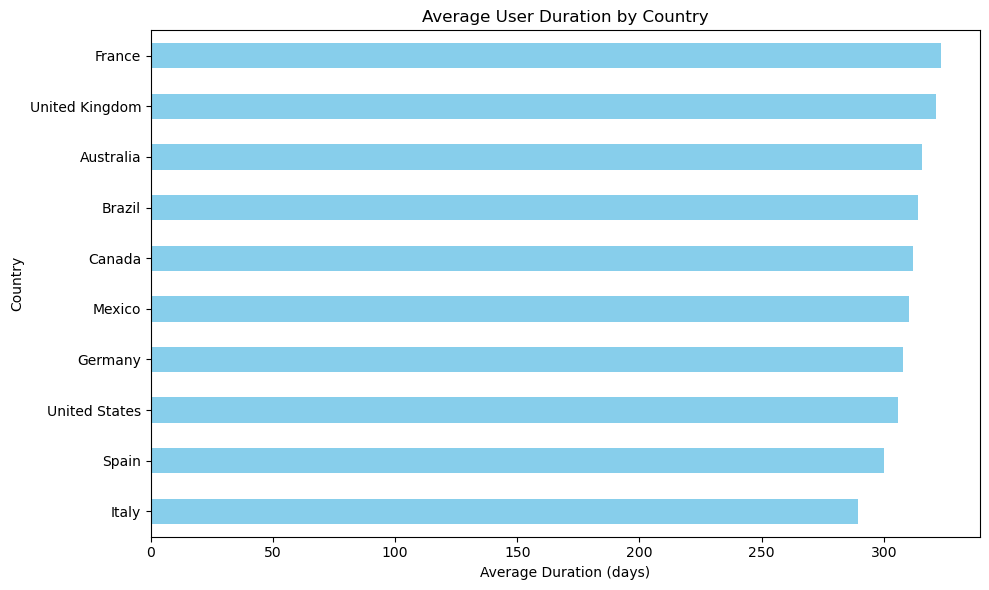

In [30]:
avg_duration_by_country = df.groupby('Country')['Duration (days)'].mean().sort_values()

plt.figure(figsize=(10, 6))
avg_duration_by_country.plot(kind='barh', color='skyblue')
plt.title('Average User Duration by Country')
plt.xlabel('Average Duration (days)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

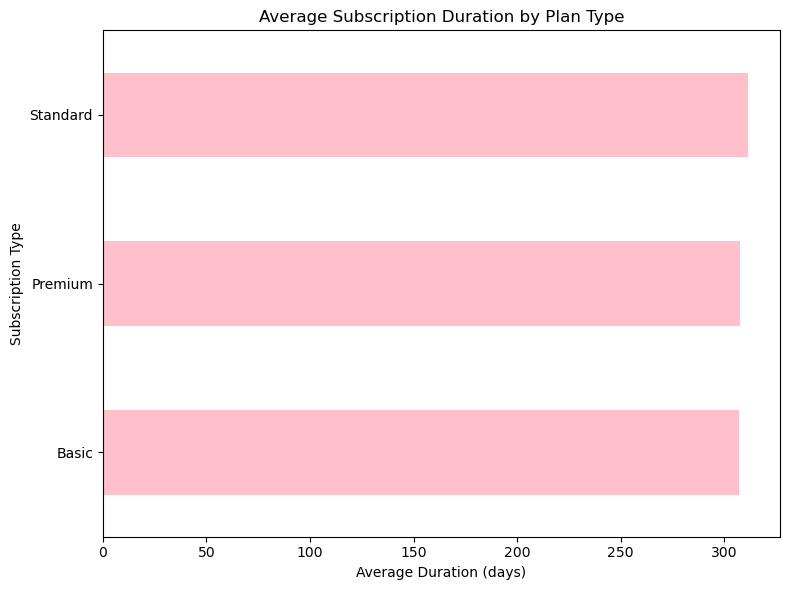

In [32]:
avg_duration_by_plan = df.groupby('Subscription Type')['Duration (days)'].mean()

plt.figure(figsize=(8, 6))
avg_duration_by_plan.sort_values().plot(kind='barh', color='pink')
plt.title('Average Subscription Duration by Plan Type')
plt.xlabel('Average Duration (days)')
plt.ylabel('Subscription Type')
plt.tight_layout()
plt.show()

In [34]:
df['Duration (months)'] = df['Duration (days)'] / 30  

df['Generated Revenue($)'] = df['Monthly Revenue'] * df['Duration (months)']

df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,Duration (days),Duration (months),Generated Revenue($)
0,1,Basic,10,2022-01-15,2023-06-10,United States,28,Male,Smartphone,1 Month,511,17.033333,170.333333
1,2,Premium,15,2021-09-05,2023-06-22,Canada,35,Female,Tablet,1 Month,655,21.833333,327.500000
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month,119,3.966667,47.600000
3,4,Standard,12,2022-07-10,2023-06-26,Australia,51,Female,Laptop,1 Month,351,11.700000,140.400000
4,5,Basic,10,2023-05-01,2023-06-28,Germany,33,Male,Smartphone,1 Month,58,1.933333,19.333333


In [35]:
df['Generated Revenue($)'].sum()

321674.6666666666

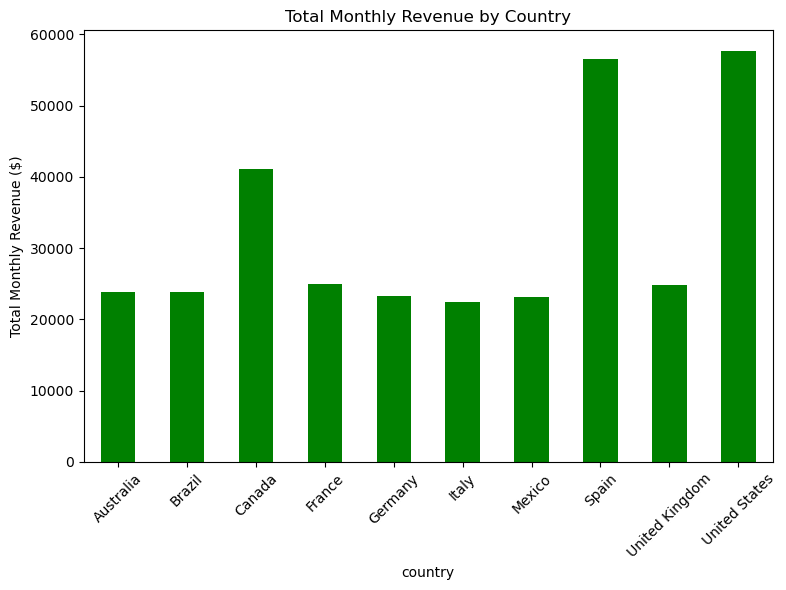

In [39]:
total_revenue_by_country = df.groupby('Country')['Generated Revenue($)'].sum()

plt.figure(figsize=(8, 6))
total_revenue_by_country.plot(kind='bar', color='green')
plt.title('Total Monthly Revenue by Country')
plt.xlabel('country')
plt.ylabel('Total Monthly Revenue ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

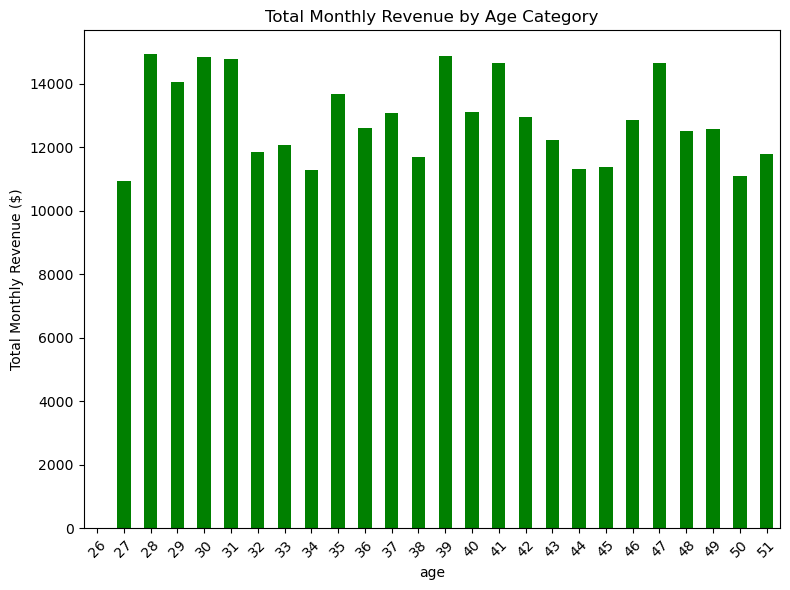

In [38]:
total_revenue_by_Age = df.groupby('Age')['Generated Revenue($)'].sum()

plt.figure(figsize=(8, 6))
total_revenue_by_Age.plot(kind='bar', color='green')
plt.title('Total Monthly Revenue by Age Category')
plt.xlabel('age')
plt.ylabel('Total Monthly Revenue ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

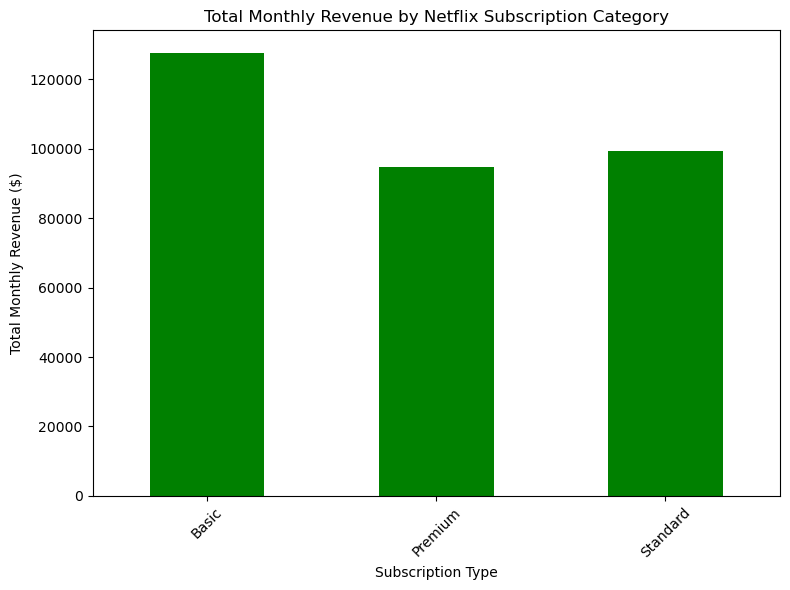

In [41]:
total_revenue_by_plan = df.groupby('Subscription Type')['Generated Revenue($)'].sum()

plt.figure(figsize=(8, 6))
total_revenue_by_plan.plot(kind='bar', color='green')
plt.title('Total Monthly Revenue by Netflix Subscription Category')
plt.xlabel('Subscription Type')
plt.ylabel('Total Monthly Revenue ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()